# Decision Tree Classification with Breast Cancer Dataset

This notebook demonstrates the implementation of a Decision Tree Classifier for the Breast Cancer Wisconsin dataset. We will build a model to classify breast cancer tumors as either benign or malignant based on various features.

Accuracy: 94.73684210526315 %

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.91      0.93        43
      benign       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Prediction for sample: Benign


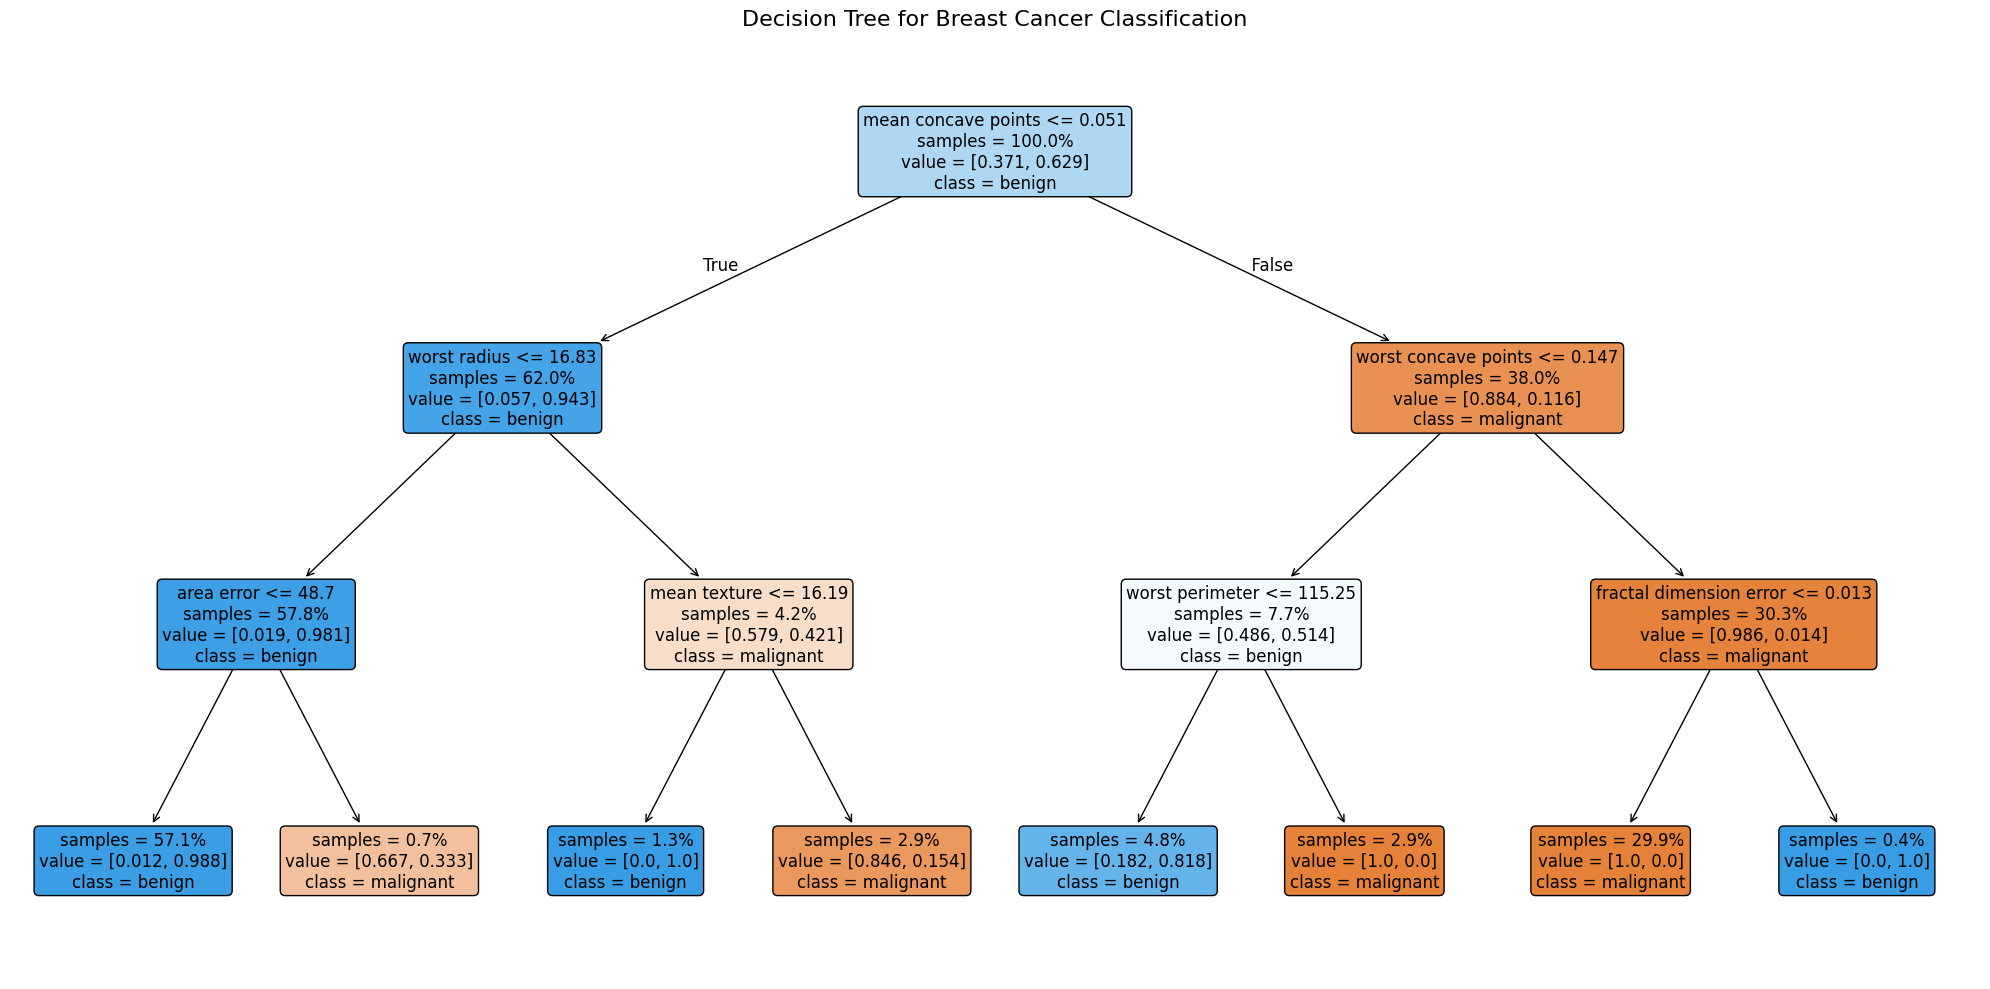


Text representation of the decision tree:
|--- mean concave points <= 0.05
|   |--- worst radius <= 16.83
|   |   |--- area error <= 48.70
|   |   |   |--- class: 1
|   |   |--- area error >  48.70
|   |   |   |--- class: 0
|   |--- worst radius >  16.83
|   |   |--- mean texture <= 16.19
|   |   |   |--- class: 1
|   |   |--- mean texture >  16.19
|   |   |   |--- class: 0
|--- mean concave points >  0.05
|   |--- worst concave points <= 0.15
|   |   |--- worst perimeter <= 115.25
|   |   |   |--- class: 1
|   |   |--- worst perimeter >  115.25
|   |   |   |--- class: 0
|   |--- worst concave points >  0.15
|   |   |--- fractal dimension error <= 0.01
|   |   |   |--- class: 0
|   |   |--- fractal dimension error >  0.01
|   |   |   |--- class: 1



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load data and split into train/test sets
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Create a decision tree with limited depth for better visualization
clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print model performance
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")

# Sample prediction
sample = X_test[0].reshape(1, -1)
print("\nPrediction for sample:", "Benign" if clf.predict(sample)[0] else "Malignant")

# Create a larger figure for better visibility
plt.figure(figsize=(20, 10))

# Plot the tree with larger font size and improved clarity
plot_tree(clf, 
          filled=True, 
          feature_names=data.feature_names, 
          class_names=data.target_names,
          fontsize=12,
          proportion=True,
          impurity=False,
          rounded=True)

plt.title("Decision Tree for Breast Cancer Classification", fontsize=16)
plt.tight_layout()
plt.show()



## Decision Tree Visualization Explanation

The improved decision tree visualization above shows:

1. **Nodes**: Each box represents a decision node
   - **Feature**: The top line shows which feature is used for the split
   - **Threshold**: The value used to make the decision
   - **Samples**: Number of samples at this node
   - **Value**: Distribution of classes [benign, malignant]
   - **Class**: Predicted class at this node

2. **Colors**: 
   - Blue nodes have mostly benign samples
   - Orange nodes have mostly malignant samples
   - The intensity of color indicates confidence

3. **Limited to depth 3** for better readability (the original tree was too complex to visualize clearly)

The text representation below the visualization provides another way to understand the tree's decision logic.